<a href="https://colab.research.google.com/github/mkbahk/graphcore-ipu-demo/blob/main/MNIST_Keras_101_Sample_JSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module Import

In [57]:
from tensorflow import keras

#Load MNIST DataSet


In [58]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("# of x_train", len(x_train))
print("# of y_train", len(y_train))
print("# of x_test", len(x_test))
print("# of y_test", len(y_test))

# of x_train 60000
# of y_train 60000
# of x_test 10000
# of y_test 10000


#Transfer Learning 데모를 위하 Training Set을 2개로 슬라이싱



In [59]:
tx_train = x_train[50000:]
ty_train = y_train[50000:]

x_train = x_train[:50000]
y_train = y_train[:50000]

print("# of x_train", len(x_train))
print("# of y_train", len(y_train))

print("# of tx_train", len(tx_train))
print("# of ty_train", len(ty_train))

# of x_train 50000
# of y_train 50000
# of tx_train 10000
# of ty_train 10000


#ValidationSet을 위한 TestSet 슬라이싱

In [60]:
x_val = x_test[5000:]
y_val = y_test[5000:]

x_test = x_test[:5000]
y_test = y_test[:5000]

print("# of x_test", len(x_test))
print("# of y_test", len(y_test))

print("# of x_val", len(x_val))
print("# of y_val", len(y_val))

# of x_test 5000
# of y_test 5000
# of x_val 5000
# of y_val 5000


In [61]:
i = 0 
for i in range(5):
  print(y_train[i])
#end of for

5
0
4
1
9


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

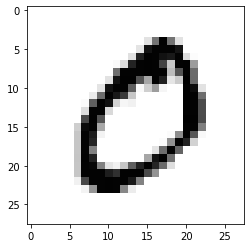

In [62]:
import matplotlib.pyplot as plt

image_index = 1 # You may select anything up to 60,000

print(x_train[image_index], "\n\n") # The label is 0
print(x_test[image_index], "\n\n") # The label is 2

print(y_train[image_index], "\n\n")
print(y_test[image_index], "\n\n")

print("x_train", x_train.shape, "x_test", x_test.shape, "리스트(배열,행렬)\n\n")
print("y_train", y_train.shape, "y_test", y_test.shape, "리스트(배열,행렬)\n\n")


plt.imshow(x_train[image_index], cmap='Greys')



#one-hot enconding 수행<br>
5 --> 0 0 0 0 0 1 0 0 0 0<br>
1 --> 0 1 0 0 0 0 0 0 0 0<br>


In [63]:
y_train = keras.utils.to_categorical(y=y_train, num_classes = 10)
ty_train = keras.utils.to_categorical(y=ty_train, num_classes = 10)
y_test = keras.utils.to_categorical(y=y_test, num_classes=10)
y_val = keras.utils.to_categorical(y=y_val, num_classes=10)

#리스트 데이타들 출력해 보기
j = 0
for j in range(2):
   print("\n=====Y Train  Value======", y_train[j])
#end of for

t = 0
for t in range(2):
   print("\n=====TY Train Value======", ty_train[j])
#end of for

k = 0
for k in range(2):
   print("\n=====Y Test   Value======", y_test[k])
#end of for

v = 0
for v in range(2):
   print("\n=====Y Val    Value======", y_val[v])
#end of for


=====Y Train  Value====== [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

=====Y Train  Value====== [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

=====TY Train Value====== [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

=====TY Train Value====== [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

=====Y Test   Value====== [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

=====Y Test   Value====== [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

=====Y Val    Value====== [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

=====Y Val    Value====== [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#DataSet 형변환


In [64]:
x_train = x_train.reshape(50000, 28*28)
tx_train = tx_train.reshape(10000, 28*28)

x_test = x_test.reshape(5000, 28*28)
x_val = x_val.reshape(5000, 28*28)

print(x_train.shape, tx_train.shape,  x_test.shape, x_val.shape)
print(y_train.shape, ty_train.shape, y_test.shape, x_val.shape)

(50000, 784) (10000, 784) (5000, 784) (5000, 784)
(50000, 10) (10000, 10) (5000, 10) (5000, 784)


In [65]:
# https://www.youtube.com/watch?v=UOvPeC8WOt8

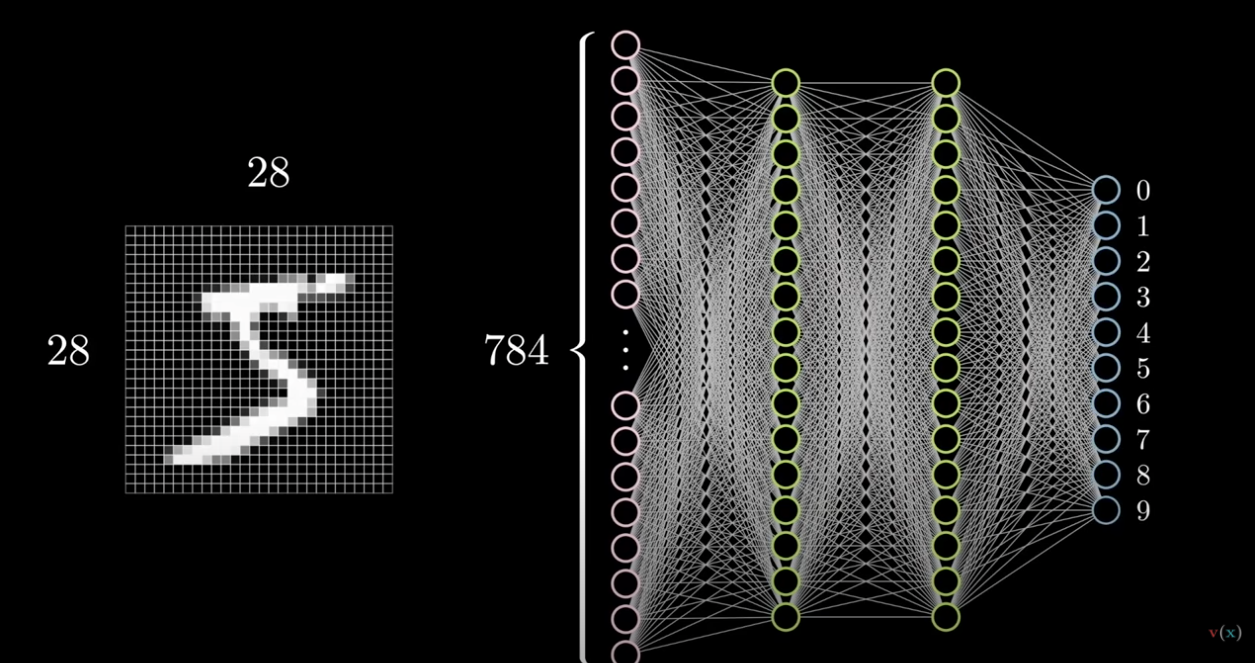

#모델 구조 생성


In [66]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation="sigmoid", input_shape=(28*28,)))
model.add(keras.layers.Dense(32, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

모델구조 #보기

In [67]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=['accuracy'])

#모델구성요소 컴파일 및 구조보기
<br>파라메터 숫자: 
<br>dense_3: (28x28) x 32+32(bias) = 25120
<br>dense_4: 32x32+32(bias) = 1056
<br>dense_5: 32x10+10(bias) = 30

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


#모델 훈련


In [69]:
hist=model.fit(x=x_train, y=y_train, batch_size=1000, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
50/50 [==============================] - 1s 12ms/step - loss: 2.2912 - accuracy: 0.2279 - val_loss: 2.0036 - val_accuracy: 0.6150
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 1.9671 - accuracy: 0.5884 - val_loss: 1.7494 - val_accuracy: 0.7126
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 1.7191 - accuracy: 0.6732 - val_loss: 1.5028 - val_accuracy: 0.7562
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 1.4868 - accuracy: 0.7317 - val_loss: 1.2664 - val_accuracy: 0.8112
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - loss: 1.2718 - accuracy: 0.7751 - val_loss: 1.0708 - val_accuracy: 0.8384
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 1.0920 - accuracy: 0.8070 - val_loss: 0.9050 - val_accuracy: 0.8654
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 0.9472 - accuracy: 0.8326 - val_loss: 0.7894 - val_accuracy: 0.8808
Epoch 8/100


#생성된 모델을 이용한 추론(평가, 예측)


In [70]:
model.evaluate(x_test, y_test )

157/157 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.9110


[0.2846226096153259, 0.9110000133514404]

#모델 수행 히스토리 그래프보기

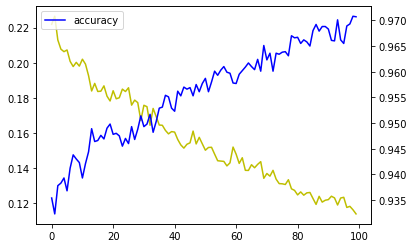

In [79]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='loss')
#loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
#acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['accuracy','loss'])
#plt.legend(['train loss', 'train accuracy', 'validation loss', 'validation accuracy'])
plt.show()

#모델 바이러리(Weight) 저장

In [72]:
model.save("MNIST-Keras-101-Pre_trained.h5")
model.save_weights("MNIST-Keras-101-Pre_trained_weights")

#저장된 모델 로드


In [73]:
from keras.models import load_model
ts_model = load_model("MNIST-Keras-101-Pre_trained.h5")
ts_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


#로드된 모델에 새로운 데이타 Re-Training(Transfer Learning)


In [74]:
hist=ts_model.fit(x=tx_train, y=ty_train, batch_size=1000, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
10/10 [==============================] - 0s 28ms/step - loss: 0.2219 - accuracy: 0.9354 - val_loss: 0.1882 - val_accuracy: 0.9454
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2264 - accuracy: 0.9323 - val_loss: 0.1838 - val_accuracy: 0.9486
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2129 - accuracy: 0.9378 - val_loss: 0.1762 - val_accuracy: 0.9488
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.2077 - accuracy: 0.9383 - val_loss: 0.1836 - val_accuracy: 0.9464
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.2063 - accuracy: 0.9393 - val_loss: 0.1819 - val_accuracy: 0.9486
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2072 - accuracy: 0.9368 - val_loss: 0.1766 - val_accuracy: 0.9488
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2008 - accuracy: 0.9412 - val_loss: 0.1842 - val_accuracy: 0.9504
Epoch 

In [75]:
ts_model.evaluate(x_test, y_test)

157/157 [==============================] - 0s 1ms/step - loss: 0.2724 - accuracy: 0.9194


[0.27243366837501526, 0.9193999767303467]

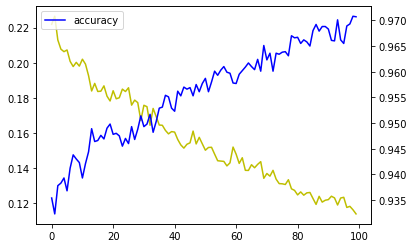

In [78]:
fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='loss')
#loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
#acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['accuracy','loss'])
#plt.legend(['train loss', 'train accuracy', 'validation loss', 'validation accuracy'])
plt.show()

In [77]:
model.save("MNIST-Keras-101-Transfer_learned.h5")
model.save_weights("MNIST-Keras-101-Transfer_learned_weights")

#end of codes